In [1]:
import pandas as p
import numpy as n
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
#import metrics

In [2]:
data=p.read_csv('train.csv')
data_test=p.read_csv('test.csv')
data_test_output=p.read_csv('sampleSubmission.csv')
data.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


### Creating some features

In [3]:
data['total_day_eve_minutes']=data['total_day_minutes']+data['total_eve_minutes']
data['total_day_eve_calls']=data['total_day_calls']+data['total_eve_calls']
data['total_day_eve_charge']=data['total_day_charge']+data['total_eve_charge']
data['total_day_night_minutes']=data['total_day_minutes']+data['total_night_minutes']
data['total_day_night_calls']=data['total_day_calls']+data['total_night_calls']
data['total_day_night_charge']=data['total_day_charge']+data['total_night_charge']
data['total_eve_night_minutes']=data['total_night_minutes']+data['total_eve_minutes']
data['total_eve_night_calls']=data['total_night_calls']+data['total_eve_calls']
data['total_eve_night_charge']=data['total_night_charge']+data['total_eve_charge']
data['total_day_eve_night_minutes']=data['total_day_minutes']+data['total_eve_minutes']+data['total_night_minutes']
data['total_day_eve_night_calls']=data['total_day_calls']+data['total_eve_calls']+data['total_night_calls']
data['total_day_eve_night_charge']=data['total_day_charge']+data['total_eve_charge']+data['total_night_minutes']

In [4]:
n.where(data['total_day_calls']!=0,data['total_day_minutes']/data['total_day_calls'],0)

array([1.31382114, 2.13508772, 4.21690141, ..., 1.69009901, 1.85590551,
       1.26862745])

In [5]:
#average calls duration
data['average_duration_day']=n.where(data['total_day_calls']!=0,data['total_day_minutes']/data['total_day_calls'],0)
data['average_duration_eve']=n.where(data['total_eve_calls']!=0,data['total_eve_minutes']/data['total_eve_calls'],0)
data['average_duration_night']=n.where(data['total_night_calls']!=0,data['total_night_minutes']/data['total_night_calls'],0)

In [6]:
data['average_duration_day_eve']=data['total_day_eve_minutes']/data['total_day_eve_calls']
data['average_duration_eve_night']=data['total_eve_night_minutes']/data['total_eve_night_calls']
data['average_duration_day_night']=data['total_day_night_minutes']/data['total_day_night_calls']
data['average_duration_day_eve_night']=data['total_day_eve_night_minutes']/data['total_day_eve_night_calls']

In [7]:
data['average_customer_service_call']=data['number_customer_service_calls']/data['account_length']

In [8]:
data['monthly_avg_day_minutes']=data['total_day_minutes']/data['account_length']
data['monthly_avg_night_minutes']=data['total_night_minutes']/data['account_length']
data['monthly_avg_eve_minutes']=data['total_eve_minutes']/data['account_length']

data['monthly_avg_day_calls'] = data['total_day_calls']/data['account_length']
data['monthly_avg_night_calls'] = data['total_night_calls']/data['account_length']
data['monthly_avg_eve_calls'] = data['total_eve_calls']/data['account_length']

data['monthly_avg_day_charge'] = data['total_day_charge']/data['account_length']
data['monthly_avg_night_charge'] = data['total_night_charge']/data['account_length']
data['monthly_avg_eve_charge'] = data['total_eve_charge']/data['account_length']

data['monthly_avg_day_night_minutes']=data['total_day_night_minutes']/data['account_length']
data['monthly_avg_eve_night_minutes']=data['total_eve_night_minutes']/data['account_length']
data['monthly_avg_day_eve_minutes']=data['total_day_eve_minutes']/data['account_length']

data['monthly_avg_day_night_calls']=data['total_day_night_calls']/data['account_length']
data['monthly_avg_eve_night_calls']=data['total_eve_night_calls']/data['account_length']
data['monthly_avg_day_eve_calls']=data['total_day_eve_calls']/data['account_length']

data['monthly_avg_day_night_charge']=data['total_day_night_charge']/data['account_length']
data['monthly_avg_eve_night_charge']=data['total_eve_night_charge']/data['account_length']
data['monthly_avg_day_eve_charge']=data['total_day_eve_charge']/data['account_length']

data['monthly_avg_day_eve_night_minutes']=data['total_day_eve_night_minutes']/data['account_length']
data['monthly_avg_day_eve_night_calls']=data['total_day_eve_night_calls']/data['account_length']
data['monthly_avg_day_eve_night_charge']=data['total_day_eve_night_charge']/data['account_length']

- Handling churn, international_plans, and voice_mail_plans categorical features

In [9]:
data['churn']=[1 if  x=="yes" else 0 for x in data.churn]
data['international_plan']=[1 if  x=="yes" else 0 for x in data.international_plan]
data['voice_mail_plan']=[1 if  x=="yes" else 0 for x in data.voice_mail_plan]


data_test['international_plan']=[1 if  x=="yes" else 0 for x in data_test.international_plan]
data_test['voice_mail_plan']=[1 if  x=="yes" else 0 for x in data_test.voice_mail_plan]

In [10]:
data=p.concat([data,p.get_dummies(data.area_code,drop_first=True)],axis=1)
data_test=p.concat([data_test,p.get_dummies(data_test.area_code,drop_first=True)],axis=1)

### Response Coding/Target Coding State Column

In [11]:
s=[]
s2=[]
for i in data['state'].unique():
    j=(len(data[(data['state']==i)&(data['churn']==0)]['churn']))
    k=(len(data[(data['state']==i)&(data['churn']==1)]['churn']))
    s.append(i)
    s2.append(k/(j+k))
x=p.DataFrame({'state':s,'state_1':s2})
data=x.merge(data,left_on='state',right_on='state')
data_test=x.merge(data_test,left_on='state',right_on='state')

In [12]:
data.head()

,state,state_1,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,monthly_avg_eve_night_calls,monthly_avg_day_eve_calls,monthly_avg_day_night_charge,monthly_avg_eve_night_charge,monthly_avg_day_eve_charge,monthly_avg_day_eve_night_minutes,monthly_avg_day_eve_night_calls,monthly_avg_day_eve_night_charge,area_code_415,area_code_510
0,OH,0.126316,107,area_code_415,0,1,26,161.6,123,27.47,...,1.925234,2.112150,0.363738,0.262336,0.412056,5.714953,3.074766,2.789626,1,0
1,OH,0.126316,84,area_code_408,1,0,0,299.4,71,50.90,...,2.107143,1.892857,0.711429,0.168095,0.668571,6.645238,2.952381,3.012619,0,0
2,OH,0.126316,65,area_code_408,0,0,0,187.9,116,31.94,...,3.123077,3.584615,0.648769,0.363538,0.697538,8.812308,4.907692,4.194462,0,0
3,OH,0.126316,83,area_code_415,0,0,0,337.4,120,57.36,...,2.771084,2.843373,0.774578,0.316386,0.923976,8.659036,4.216867,2.778193,1,0
4,OH,0.126316,63,area_code_415,1,1,36,199.0,110,33.83,...,3.222222,3.507937,0.678095,0.534127,0.930000,10.919048,4.968254,4.066508,1,0


### Filtering
- Now we will do filtering, using KS test to find important features

In [13]:
cols_ks=['international_plan','state_1','number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn', 'total_day_eve_minutes',
       'total_day_eve_calls', 'total_day_eve_charge',
       'total_day_night_minutes', 'total_day_night_calls',
       'total_day_night_charge', 'total_eve_night_minutes',
       'total_eve_night_calls', 'total_eve_night_charge',
       'total_day_eve_night_minutes', 'total_day_eve_night_calls',
       'total_day_eve_night_charge', 'average_duration_day',
       'average_duration_eve', 'average_duration_night',
       'average_duration_day_eve', 'average_duration_eve_night',
       'average_duration_day_night', 'average_duration_day_eve_night',
       'average_customer_service_call', 'monthly_avg_day_minutes',
       'monthly_avg_night_minutes', 'monthly_avg_eve_minutes',
       'monthly_avg_day_calls', 'monthly_avg_night_calls',
       'monthly_avg_eve_calls', 'monthly_avg_day_charge',
       'monthly_avg_night_charge', 'monthly_avg_eve_charge',
       'monthly_avg_day_night_minutes', 'monthly_avg_eve_night_minutes',
       'monthly_avg_day_eve_minutes', 'monthly_avg_day_night_calls',
       'monthly_avg_eve_night_calls', 'monthly_avg_day_eve_calls',
       'monthly_avg_day_night_charge', 'monthly_avg_eve_night_charge',
       'monthly_avg_day_eve_charge', 'monthly_avg_day_eve_night_minutes',
       'monthly_avg_day_eve_night_calls', 'monthly_avg_day_eve_night_charge','account_length']

In [14]:
import scipy.stats as sps
j=0
ks_score=p.DataFrame(n.zeros((len(cols_ks),2)))
ks_score.columns = ['variable','score']  
for column in cols_ks:
            ks_score.loc[j,'variable'] = column
            ks_score.loc[j,'score'] = sps.ks_2samp(data[data['churn']==0][column],data[data['churn']==1][column])[0]
            j = j+1


In [15]:
ks_score

,variable,score
0,international_plan,0.216559
1,state_1,0.165768
2,number_vmail_messages,0.144640
3,total_day_minutes,0.323023
4,total_day_calls,0.036439
5,total_day_charge,0.323023
6,total_eve_minutes,0.105245
7,total_eve_calls,0.024009
8,total_eve_charge,0.105245
9,total_night_minutes,0.064904


In [16]:
features=ks_score[ks_score['score']>=0.05]
data=data[features.variable]
data.shape

(4250, 41)

In [17]:
data.columns

Index(['international_plan', 'state_1', 'number_vmail_messages',
       'total_day_minutes', 'total_day_charge', 'total_eve_minutes',
       'total_eve_charge', 'total_night_minutes', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn', 'total_day_eve_minutes',
       'total_day_eve_charge', 'total_day_night_minutes',
       'total_day_night_charge', 'total_eve_night_minutes',
       'total_eve_night_charge', 'total_day_eve_night_minutes',
       'total_day_eve_night_charge', 'average_duration_day',
       'average_duration_eve', 'average_duration_night',
       'average_duration_day_eve', 'average_duration_eve_night',
       'average_duration_day_night', 'average_duration_day_eve_night',
       'average_customer_service_call', 'monthly_avg_day_minutes',
       'monthly_avg_eve_minutes', 'monthly_avg_day_calls',
       'monthly_avg_day_charge', 'monthly_avg_eve_charge',
       'monthly_avg_day_night

In [18]:
X=data.drop('churn',axis=1)
Y=data['churn']
Y=Y.values

### Metric
- We will use F1 score as our metric for classification, because for us both False Negatives and False Positives are important.

In [19]:
def F1_score(actual,predict):
    TP=sum((actual==1) & (predict==1))
    TN=sum((actual==0) & (predict==0))
    FP=sum((actual==0) & (predict==1))
    FN=sum((actual==1) & (predict==0))

    precision=TP/(TP+FP)
    recall=TP/(TP+FN)
    
    accuracy=(sum((actual==1) & (predict==1))+sum((actual==0) & (predict==0)))/len(actual)
    balanced_accuracy= ((TP/(TP+FN))+(TN/(TN+FP))) / 2
    F1=(2*precision*recall)/(precision+recall)
    return (accuracy,balanced_accuracy,precision,recall,F1)

### Wrapper
- Now we will use forward feature selection, with Random Forest as our base classifier to select top 40 features while using F1 score as the metric

In [20]:
clf=RandomForestClassifier(n_estimators=5,n_jobs=-1)
sfs=SFS(clf,k_features=40,forward=True,verbose=2,scoring="recall",cv=2,n_jobs=-1)
sfs.fit(X,Y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    1.4s finished

[2022-03-12 21:31:46] Features: 1/40 -- score: 0.34782608695652173[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  39 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:    0.3s finished

[2022-03-12 21:31:47] Features: 2/40 -- score: 0.5217391304347826[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    0.3s finished

[2022-03-12 21:31:47] Features: 3/40 -- score: 0.5752508361204013[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  37 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:    0.3

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished

[2022-03-12 21:31:54] Features: 31/40 -- score: 0.6872909698996655[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.2s finished

[2022-03-12 21:31:54] Features: 32/40 -- score: 0.7006688963210702[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   8 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.2s finished

[2022-03-12 21:31:55] Features: 33/40 -- score: 0.6739130434782609[Parallel(n_jobs=-1)]: Using 

SequentialFeatureSelector(cv=2,
                          estimator=RandomForestClassifier(n_estimators=5,
                                                           n_jobs=-1),
                          k_features=40, n_jobs=-1, scoring='recall',
                          verbose=2)

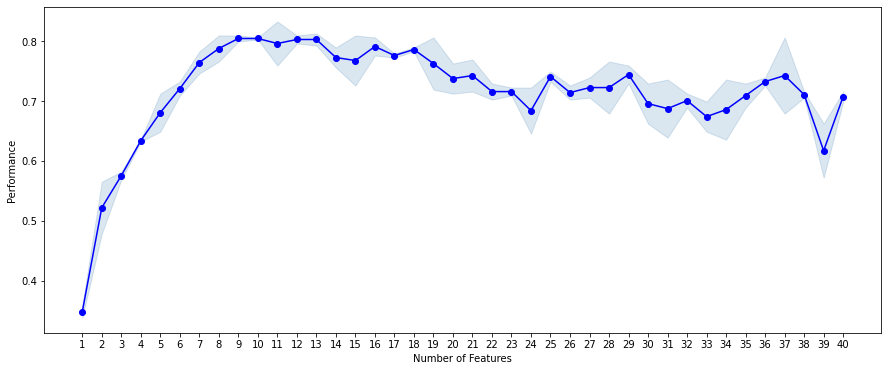

In [21]:
from mlxtend.plotting import plot_sequential_feature_selection as pltsfs
fig1 = pltsfs(sfs.get_metric_dict(),kind='std_dev',figsize=(15,6))

In [22]:
sfs.get_metric_dict()

{1: {'feature_idx': (14,),
  'cv_scores': array([0.35785953, 0.33779264]),
  'avg_score': 0.34782608695652173,
  'feature_names': ('total_day_eve_charge',),
  'ci_bound': 0.043170428728206735,
  'std_dev': 0.010033444816053505,
  'std_err': 0.010033444816053503},
 2: {'feature_idx': (12, 14),
  'cv_scores': array([0.56521739, 0.47826087]),
  'avg_score': 0.5217391304347826,
  'feature_names': ('number_customer_service_calls', 'total_day_eve_charge'),
  'ci_bound': 0.18707185782222918,
  'std_dev': 0.04347826086956519,
  'std_err': 0.04347826086956518},
 3: {'feature_idx': (7, 12, 14),
  'cv_scores': array([0.5819398 , 0.56856187]),
  'avg_score': 0.5752508361204013,
  'feature_names': ('total_night_minutes',
   'number_customer_service_calls',
   'total_day_eve_charge'),
  'ci_bound': 0.02878028581880449,
  'std_dev': 0.006688963210702337,
  'std_err': 0.006688963210702336},
 4: {'feature_idx': (0, 7, 12, 14),
  'cv_scores': array([0.63545151, 0.63210702]),
  'avg_score': 0.63377926421

In [23]:
forward_df=p.DataFrame.from_dict(sfs.get_metric_dict()).T
l1=list(forward_df[forward_df.avg_score==forward_df.avg_score.max()]['feature_names'])

In [24]:
l1

[('international_plan',
  'number_vmail_messages',
  'total_night_minutes',
  'total_night_charge',
  'total_intl_calls',
  'total_intl_charge',
  'number_customer_service_calls',
  'total_day_eve_charge',
  'total_day_eve_night_minutes'),
 ('international_plan',
  'number_vmail_messages',
  'total_night_minutes',
  'total_night_charge',
  'total_intl_minutes',
  'total_intl_calls',
  'total_intl_charge',
  'number_customer_service_calls',
  'total_day_eve_charge',
  'total_day_eve_night_minutes')]

In [25]:
X=data[list(l1[0])]  # We update X by passing only features which were selected by forward feature selection

In [26]:
col=[i for i in l1[0] if X[i].nunique()>2]  #for finding features which are not categorical, or are numerical 
# We are finding cols which need scaling.

In [27]:
col

['number_vmail_messages',
 'total_night_minutes',
 'total_night_charge',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls',
 'total_day_eve_charge',
 'total_day_eve_night_minutes']

### Scaling Numerical Features

In [28]:
for i in col:
    X[i]=(X[i]-X[i].mean())/X[i].std()

/var/folders/ws/jfyqgcz57_374tjld1g6w96m0000gn/T/ipykernel_1703/1827832355.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=(X[i]-X[i].mean())/X[i].std()


In [29]:
X

,international_plan,number_vmail_messages,total_night_minutes,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,total_day_eve_charge,total_day_eve_night_minutes
0,0,1.366696,1.069877,1.070694,-0.579096,1.248444,-0.426296,-0.354297,0.343812
1,1,-0.567845,-0.072048,-0.072329,1.044894,-1.328031,0.336228,0.843667,-0.256254
2,0,-0.567845,0.531683,0.532281,0.638897,-0.992552,-0.426296,-0.230233,-0.091883
3,0,-0.567845,-0.926010,-0.924079,1.044894,2.013335,-1.188820,2.881297,1.550698
4,1,2.110750,-0.058146,-0.059089,0.638897,0.268847,-0.426296,1.084848,1.203943
...,...,...,...,...,...,...,...,...,...
4245,0,0.622642,0.106688,0.108613,-1.391091,-0.200823,-0.426296,-0.520047,-0.810160
4246,1,-0.567845,0.768012,0.766182,2.668885,1.396055,-1.188820,-0.258023,-0.261883
4247,0,-0.567845,-1.871326,-1.872921,-0.173098,1.758372,-0.426296,0.364283,-0.773008
4248,0,-0.567845,0.795815,0.797074,-0.173098,0.416458,-0.426296,1.222807,1.476393


## Machine Learning

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_cv,Y_train,Y_cv=train_test_split(X,Y,test_size=0.3,stratify=Y)

### Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,Y_train)
pred=model.predict(X_cv)

In [38]:

(pred==1).sum()

189

In [39]:
F1_score(Y_cv,pred)

(0.9450980392156862,
 0.897952942135954,
 0.7883597883597884,
 0.8324022346368715,
 0.8097826086956522)